In [ ]:
#I'm trying to do the very basics with this excercise. My goal is to train a linear regression model with some set of 
#variables in this data set to determine price of used car

#1Importing libraries
#2Load data
#3Preprocessing a. Exploring descriptive statistics b. Determing variable of interest c. Dealing with missing values
#4Exploring Probability distribution function
#5Removing outliers
#6Checking OLS assumptions
#7Dealing with multicollinearity
#8Creating dummies with categorical variables
#9Linear Regression model a. Declare x and y b. Scale the data c. Train\test split d. Create Regression e. Finding the weight and bias f. Testing
#10Conclusion
#11How to improve model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

In [7]:
#Load the data from a csv in the same folder
raw_data = pd.read_csv("C:/Users/admin/Downloads/car dataset.csv")

#Exploring the first 5 row of the data
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [9]:
### PREPROCESSING
#Exploring the descriptive statistics of the variable

In [8]:
#Descriptive statistics are very useful for initial exploration of the variables
#By default, only descriptives for the numerical variables are shown
#To include the categorical ones, you should specify this with an argument(include = all)

raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
#Determining the variables of interest
#The variable 'model' is removed because it has too many unique values
data = raw_data.drop(['Model'],axis=1)

#Description of the dataframe after 'model' is removed
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [11]:
##Dealing with missing values
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise

## we check for missing values to improve the accuracy of our model
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
#I drop all missing values, this is not always recommended but when less than 5% of the data is removed it is okay
data_mv = data.dropna(axis=0)

#Checking the descriptives without the missing values
data_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
###Exploring probability distribution functions for each feature

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

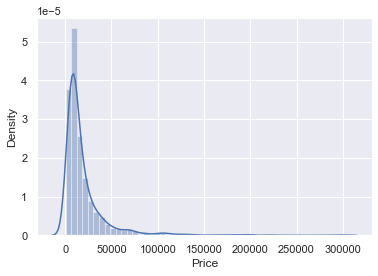

In [25]:
#A great step in the data exploration is to display the probability distribution function (PDF) of a variable which will
#show us how that variable is distributed
#This makes it very easy to spot anomalies, such as outliers
#The PDF is often the basis on which its decided whether to transform a feature or not
sns.distplot(data_mv['Price'])

In [16]:
###Removing outliers

In [ ]:
#Obviously there are some outliers present 

#Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic 
#samples. Here, the outliers are situated around the higher prices (right side of the graph)

#Logic is applied, this is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus they must dealt with

In [17]:
#Declaring a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_mv['Price'].quantile(0.99)

#Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_mv[data_mv['Price']<q]

# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

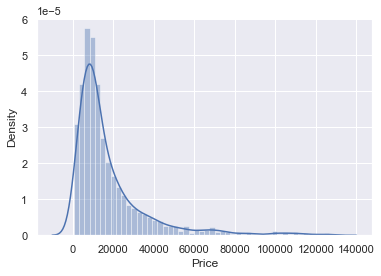

In [26]:
#Check the PDF once again, here we can see that the outliers have reduced drastically

sns.distplot(data_1['Price'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

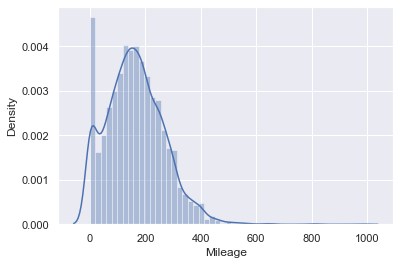

In [27]:
sns.distplot(data_mv['Mileage'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

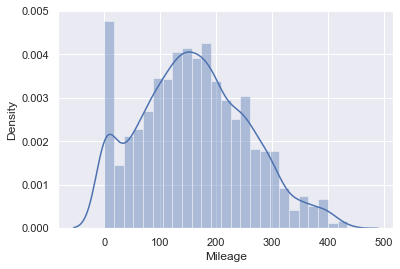

In [28]:
#Other variables can be solved in a similar way

q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

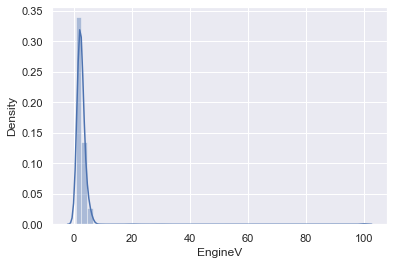

In [29]:
sns.distplot(data_mv['EngineV'])

In [30]:
#From the above it can be seen that engine volume is very strange
#I manually check what may be causing the problem and in this case the issue comes from the fact that most missing values 
#are indicated with 99.99 or 99. There are also some incorrect entries like 75


# A simple Google search can indicate the natural domain of this variable. Car engine volumes are usually/always below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

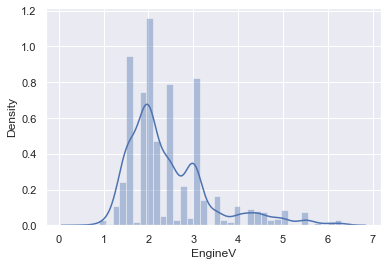

In [31]:
sns.distplot(data_3['EngineV'])

# After plotting the graph to see PDF we can see great improvment and outliers has decreased significantly

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

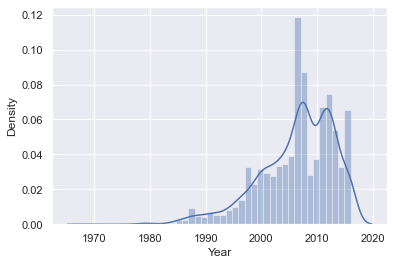

In [32]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage', however, the outliers are on the low end

sns.distplot(data_mv['Year'])

In [33]:
#Declaring a variable that will be equal to the 1st percentile of the 'Year' variable
q = data_3['Year'].quantile(0.01)

# Then we can create a new df, with the condition that all year must be below the 1 percentile of 'Year'
data_4 = data_3[data_3['Year']>q]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

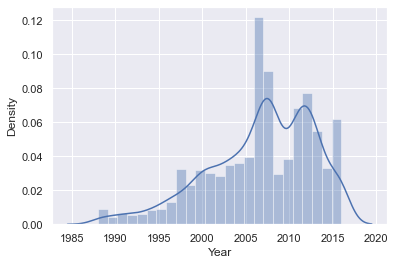

In [34]:
#Check out the result now

sns.distplot(data_4['Year'])

In [35]:
#When we remove observations, the original indexes are preserved
#If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
#It can be very problematic as we tend to forget about it (an example of such a problem will be seen later)

#Once we reset the index, a new column will be created containing the old index (just in case) but we won't be needing it,
#thus 'drop=True' to completely forget about it

In [36]:
data_cleaned = data_4.reset_index(drop=True)

#Lets see our clean dataset

data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [37]:
###Checking OLS assumptions

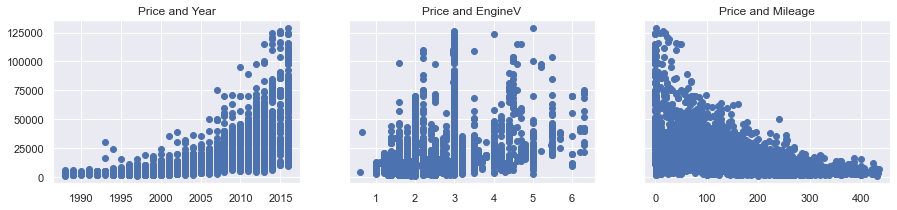

In [38]:
#Lets do some matplotlib code and plot variables against each other on a scatter plot
#since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [39]:
#From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed instead of a 
#linear relationship

#A good transformation in this case is a log transformation

In [40]:
#Let's transform 'Price' with a log transformation
data_log = np.log(data_cleaned['Price'])

#Add the new price to our data frame
data_cleaned['log_price'] = data_log
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


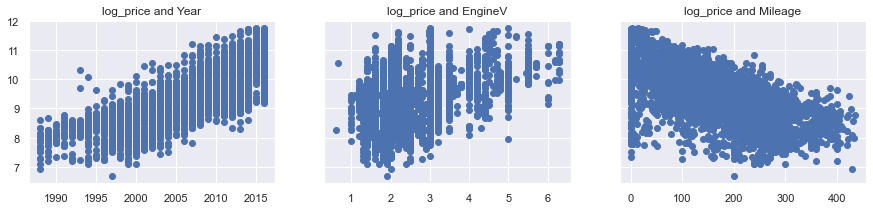

In [41]:
#Lets check again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

#The relationships show a clear linear relationship
#This is some good linear regression material

#Alternatively we could have transformed each of the independent variables

In [42]:
#Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [43]:
###Dealing With Multicollinearity

In [45]:
#The columns of our data frame
data_cleaned.columns.values

#sklearn does not have a built-in way to check for multicollinearity

#Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

#we declare a variable where we put all features where we want to check for multicollinearity
#since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

#we create a new data frame which will include all the VIFs
#note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

#here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

#Explore the result
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [46]:
#From the result above we can see that 'Year' has the highest VIFs. If 'Year' is removed from the data frame it will cause 
#the other varibles VIFs to reduce. Hence 'Year' will be removed.

In [47]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [48]:
#Use the same method shown above to check the VIFs to see if the reduced since 'Year' has been dropped

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [49]:
vif
#From our result you can see that VIFs has drastically reduced for each variable

,VIF,Features
0,2.805214,Mileage
1,2.805214,EngineV


In [50]:
###Creating dummies with categorical variables

In [51]:
#To include the categorical data in the regression, let's create dummies with a very convenient method called: 'get_dummies' which does that seemlessly
#It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

data_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [52]:
# Here's the result
data_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [53]:
#The dependent variable is placed in the beginning to make the data frame more organized
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [55]:
#To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variab;es and dummi

cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [56]:
#To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [57]:
###Linear regression model

In [58]:
#Declare x and y
#The target is the dependent variable which is the 'log_price'
targets = data_preprocessed['log_price']

#The independent variabke is everything else but the log)orice so it wise to just drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [59]:
#Scale the data
#Import scaling module
from sklearn.preprocessing import StandardScaler

#Create scaling object
scaler = StandardScaler()

#fit the inputs
scaler.fit(inputs)


#we scale when we want to handle disparities in units and improve performance of your model

StandardScaler()

In [60]:
#Scale the features and store them in a new variable 
inputs_scaled = scaler.transform(inputs)

In [61]:
#Train Test Split
#Import the split model
from sklearn.model_selection import train_test_split

#Split the variables with an 80-20 split and some random state
#To have the same split as mine, use random_state = 200
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets)

In [62]:
#Create regression
#Create a regression object
reg = LinearRegression()

#Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

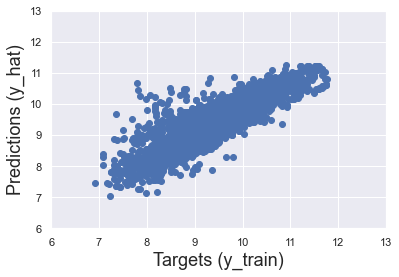

In [63]:
#Let's check the outputs of the regression
#I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)


#The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
#The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)


#Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
#Sometimes the plot will have different scales of the x-axis and the y-axis
#We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

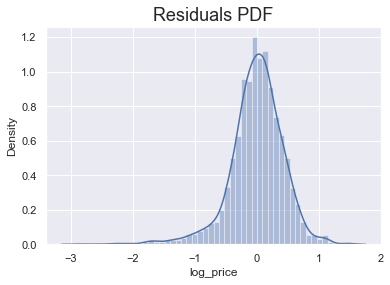

In [64]:
#We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

#Include a title
plt.title("Residuals PDF", size=18)

#In the best case scenario this plot should be normally distributed
#In our case we notice that there are many negative residuals (far away from the mean)
#Given the definition of the residuals (y_train - y_hat), negative values imply
#that y_hat (predictions) are much higher than y_train (the targets)
#This is food for thought to improve our model

In [65]:
#Find the R-squared of the model
reg.score(x_train,y_train)

0.7509147374099723

In [66]:
#Finding the weight and bias
#Obtain the bias (intercept) of the regression
reg.intercept_

9.41155868210485

In [67]:
#Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.45879196,  0.2069942 ,  0.00432647,  0.01029301, -0.14068804,
       -0.1868524 , -0.06120401, -0.09070981, -0.15434596, -0.10545989,
       -0.2047557 , -0.12377177, -0.16118734, -0.12181164, -0.03415564,
       -0.14248175,  0.31201321])

In [68]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458792
1,EngineV,0.206994
2,Brand_BMW,0.004326
3,Brand_Mercedes-Benz,0.010293
4,Brand_Mitsubishi,-0.140688
5,Brand_Renault,-0.186852
6,Brand_Toyota,-0.061204
7,Brand_Volkswagen,-0.090710
8,Body_hatch,-0.154346
9,Body_other,-0.105460


In [69]:
#Testing
#Once we have trained our model, we can test it on a dataset that the algorithm has never seen
#Our test inputs are 'x_test', while the outputs: 'y_test'
#If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

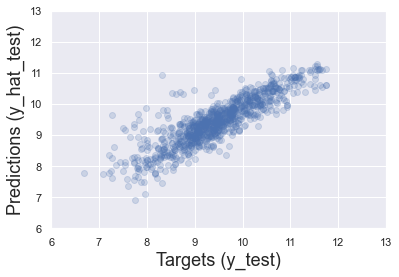

In [70]:
#Create a scatter plot with the test targets and the test predictions
#You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [71]:
#lets check these predictions
#To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10015.770319
1,3238.044036
2,9592.562220
3,30959.861133
4,36007.008612


In [72]:
#Include the test targets in that data frame to compare them with the predictions
df_pf['Target'] = np.exp(y_test)
df_pf

#Note that we have a lot of missing values
#There is no reason to have ANY missing values, though
#This suggests that something is wrong with the data frame

,Prediction,Target
0,10015.770319,NaN
1,3238.044036,NaN
2,9592.562220,NaN
3,30959.861133,NaN
4,36007.008612,NaN
...,...,...
962,9605.176384,NaN
963,9187.588738,5999.0
964,8736.882032,NaN
965,4162.363842,12000.0


In [73]:
#After displaying y_test, we find what the issue is
#The old indexes are preserved (recall earlier in that code we made a note on that)
#The code was: data_cleaned = data_4.reset_index(drop=True)

#Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#Check the result
y_test.head()

0     9.259035
1     7.740230
2     9.923290
3    11.050890
4    10.770588
Name: log_price, dtype: float64

In [74]:
#Let's overwrite the 'Target' column with the appropriate values
#Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10015.770319,10499.0
1,3238.044036,2299.0
2,9592.562220,20400.0
3,30959.861133,63000.0
4,36007.008612,47600.0
...,...,...
962,9605.176384,13300.0
963,9187.588738,4200.0
964,8736.882032,8200.0
965,4162.363842,4000.0


In [75]:
#Calculate the difference between the targets and the predictions
#Note that this is actually the residual
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [76]:
#Finally, lets see how far off we are from the result percentage-wise
#Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10015.770319,10499.0,483.229681,4.602626
1,3238.044036,2299.0,-939.044036,40.845761
2,9592.562220,20400.0,10807.437780,52.977636
3,30959.861133,63000.0,32040.138867,50.857363
4,36007.008612,47600.0,11592.991388,24.355024
...,...,...,...,...
962,9605.176384,13300.0,3694.823616,27.780629
963,9187.588738,4200.0,-4987.588738,118.752113
964,8736.882032,8200.0,-536.882032,6.547342
965,4162.363842,4000.0,-162.363842,4.059096


In [77]:
#Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,967.000000,967.000000,967.000000,967.000000
mean,16698.587674,19083.682161,2385.094487,37.894474
std,13419.516970,19985.868174,10794.932874,75.167566
min,1004.787610,800.000000,-50926.413349,0.072744
25%,7823.995943,7500.000000,-1975.113785,10.397770
50%,12426.208315,12399.000000,351.424244,23.010439
75%,21021.071441,22850.000000,3632.346858,39.310562
max,79199.294493,125000.000000,84873.619531,1242.107643


In [78]:
#Check these outputs manually
#To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999

#Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
23,42530.92,42500.00,-30.92,0.07
749,3503.06,3500.00,-3.06,0.09
565,2502.74,2500.00,-2.74,0.11
71,13014.47,12999.00,-15.47,0.12
244,2903.57,2900.00,-3.57,0.12
267,18569.54,18600.00,30.46,0.16
494,8945.04,8910.53,-34.51,0.39
808,40193.31,40000.00,-193.31,0.48
865,29342.13,29500.00,157.87,0.54
114,27460.29,27300.00,-160.29,0.59


In [79]:
###Conclusion

In [ ]:
#Going to the bottom of the dataframe, we can see that very few predictions are far off from the observed values. If you look
#closely at the observed column you will notice that the observed prices are extermely low.

#In conclusion, this model is using mileage, EngineV, Registration, Brand and Body Type to predict price of a used car. 
#On average it is pretty decent at predicting the price but for the last samples it isnt. All residuals for the outliers are
#negative. therefore the predictions are higher than the targets. The explanation maybe that we are missing an important 
#feature which drives the price of a used car lower. factors such as model of the car that we removed at the beginning of the
#analysis or the car was damaged in some way.

#I've used data exploration, feature scaling, data visualization, machine learning algorithm. There is still so much to 
#improve in our model like:
#How to improve our model
#Use a different set of variables
#Remove a bigger part of the outlier observation
#Use different kinds of transformations